In [1]:
import nltk
import numpy as np
import pandas as pd
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import snowball, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from binary_classifier import find_best_classifier, plot_coefficients

In [ ]:
# Isla Vista
IslaVista_results = find_best_classifier(["Isla Vista - All Excerpts - 1_2_2019.xlsx"])

In [2]:
# full data
results = find_best_classifier()

Excerpt column: Excerpt
Excerpt column: Excerpt
Excerpt column: Excerpt Copy
count vector SVC results:
[[3627  143]
 [ 215  390]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3770
           1       0.73      0.64      0.69       605

    accuracy                           0.92      4375
   macro avg       0.84      0.80      0.82      4375
weighted avg       0.91      0.92      0.92      4375

count vector LogisticRegression results:
[[3650  120]
 [ 235  370]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3770
           1       0.76      0.61      0.68       605

    accuracy                           0.92      4375
   macro avg       0.85      0.79      0.81      4375
weighted avg       0.91      0.92      0.92      4375

count vector RandomForestClassifier results:
[[3720   50]
 [ 288  317]]
              precision    recall  f1-score   support

           0       0.

In [4]:
type(results['classifier']).__name__

'SVC'

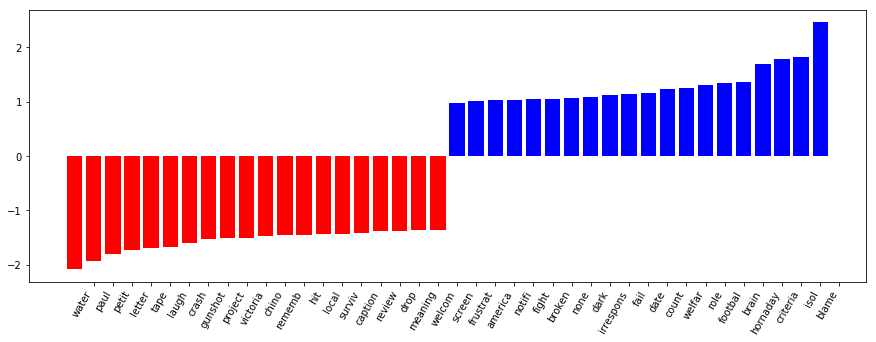

In [16]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
cv = results['vectorizer'][2]
svc = results['classifier']
plot_coefficients(svm, cv.get_feature_names())

In [17]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names =  cv.get_feature_names()

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svc.coef_[0]), feature_names, top=10)

NameError: name 'svc' is not defined